# linear-regression

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="linear-regression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajarshid/linear-regression" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rajarshid/linear-regression


'https://jovian.ai/rajarshid/linear-regression'

In [4]:
medical_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [20]:
!pip install plotly --quiet

In [45]:
import urllib
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
%matplotlib inline
urlretrieve(medical_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fde781a2eb0>)

In [13]:
df = pd.read_csv('medical.csv')
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [39]:
print(df.sex.unique())
print(df.region.unique())

['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
df.info()
# NO null values in the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.age.describe()
#min = 18, max = 64, 
#number of bins in the histogram is (64-18+1) = 47


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [72]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'

fig = px.histogram(df, x='age', marginal='box',nbins=47, title="Distribution of Age")
fig.update_layout(bargap = 0.1)
fig.show()
# The distribution is uniform except at ages between  18-20

fig = px.histogram(df, x='children', marginal='box',color_discrete_sequence=['green']
                   ,title="Distribution of Children")
fig.update_layout(bargap = 0.1)
fig.show()

In [47]:
fig = px.histogram(df, x='bmi', marginal='box',color_discrete_sequence=['red'], title="Distribution of BMI")
fig.update_layout(bargap = 0.1)
fig.show()
# BMI histogram follows a Gaussian/normal  distribution
fig = px.histogram(df, x='charges', marginal='box',color='smoker', color_discrete_sequence=['green', 'blue'],
                   title="Annual Medical Charges on the basis of smokers")
fig.update_layout(bargap = 0.1)
fig.show()
fig = px.histogram(df, x='charges', marginal='box',color='sex', color_discrete_sequence=['grey', 'blue'],
                   title="Annual Medical Charges in the basis of sex")
fig.update_layout(bargap = 0.1)
fig.show()
fig = px.histogram(df, x='charges', marginal='box',color='region'
                   , color_discrete_sequence=['red', 'blue', 'yellow','green'],
                   title="Annual Medical Charges in the basis of region")
fig.update_layout(bargap = 0.1)
fig.show()

In [44]:
print(df.smoker.value_counts())
fig = px.histogram(df, x = 'smoker', color='sex', title='distribution of smokers')
fig.show()

no     1064
yes     274
Name: smoker, dtype: int64


In [56]:
fig = px.scatter(df, x='age', y='charges', hover_data=['sex'], 
                 opacity=0.8, color='smoker', title='Scatter plot of charges with age')
fig.update_traces(marker_size = 5)
fig.show()
fig = px.scatter(df, x='bmi', y='charges', hover_data=['sex'], 
                 opacity=0.8, color='smoker', title='Scatter plot of charges with bmi')
fig.update_traces(marker_size = 5)
fig.show()
# There seems to be no real relationship between bmi and medical_charges, but in case of the smokers there are two 
#major clusters in the neightbourhood of 30k
fig = px.violin(df, x='children', y='charges')
fig.show()

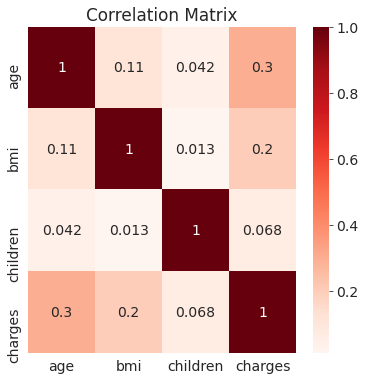

In [62]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');
#prints the correlation matrix between the features present in the dataset.
non_smoke = df[df.smoker=='no']

# Linear Regression using a single variable

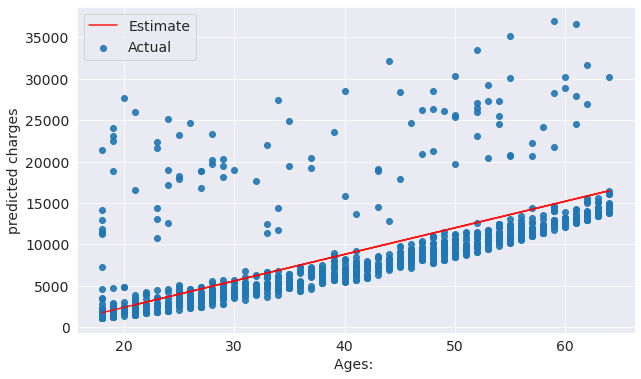

In [115]:
ages = non_smoke.age
actual_charges = non_smoke.charges
count = actual_charges.count()
def estimate(age, w, bias):
    return age * w + bias
#parameters of the model
w = 320   
bias = -4000

estimate(50, w, bias)
predicted_charges = estimate(ages, w , bias)
plt.plot(ages, predicted_charges,  'r',alpha=0.9)
plt.scatter(ages, actual_charges, alpha = 0.9)
plt.xlabel('Ages: ')
plt.ylabel('predicted charges')
plt.legend(['Estimate','Actual'])

plt.plot()

def RMSE_loss(predicted_charges, actual_charges):
    predict = predicted_charges
    actual = actual_charges
    loss = np.sqrt(np.mean(np.square(predict - actual)))
    return loss
#This line shows the comparison between the real line and the random regression line.

In [119]:
loss = RMSE_loss(predicted_charges, actual_charges)
print(loss)

4724.29241161206


## Using Linear-Regressor

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
inputs = non_smoke[['age']]
targets = non_smoke.charges
print(inputs.shape) # 2 dimensional matrix whixh acts as an input in the model.fit() method
print(targets.shape) # 1 dimensional array which acts an targets in the model.fit() method
model.fit(inputs, targets)

(1064, 1)
(1064,)


LinearRegression()

[ 4322.55335138  7796.78921819 14210.76312614]


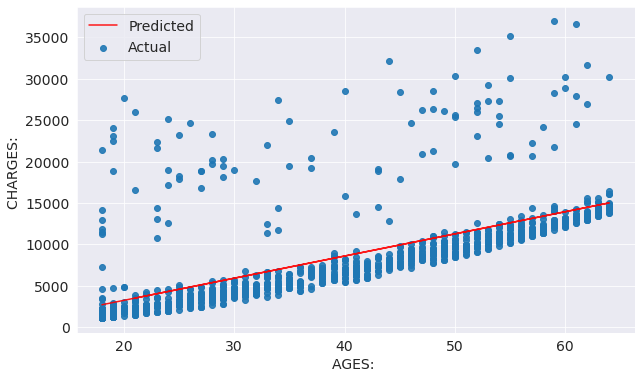

4662.505766636393


In [148]:
#making predictions from the model
result = model.predict(np.array([[24],[37],[61]]))
print(result)
results = model.predict(inputs)
plt.plot(ages, results, 'r', alpha=0.9)
plt.scatter(ages, actual_charges, alpha=0.9)
plt.xlabel('AGES: ')
plt.ylabel('CHARGES: ')
plt.legend(['Predicted','Actual'])
plt.show()

loss = RMSE_loss(results, actual_charges)
print(loss)

## Using SGD-Regressor

In [155]:
from sklearn.linear_model import SGDRegressor
model2 = SGDRegressor()
inputs = non_smoke[['age']]
targets = non_smoke.charges
print(inputs.shape) # 2 dimensional matrix whixh acts as an input in the model.fit() method
print(targets.shape) # 1 dimensional array which acts an targets in the model.fit() method
model2.fit(inputs, targets)

(1064, 1)
(1064,)


SGDRegressor()

[ 3005.10317927  7341.57504658 15347.36926314]


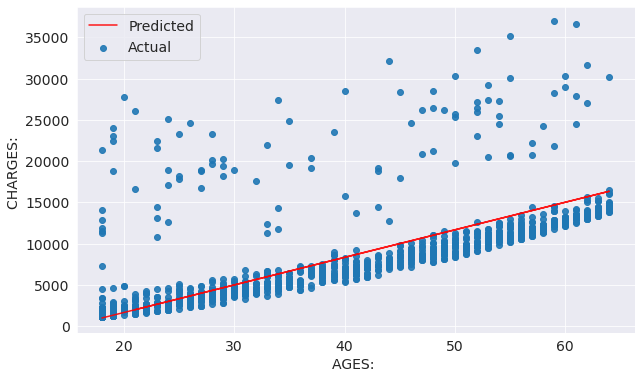

4764.334524661832


In [156]:
#making predictions from the model
result = model2.predict(np.array([[24],[37],[61]]))
print(result)
results = model2.predict(inputs)
plt.plot(ages, results, 'r', alpha=0.9)
plt.scatter(ages, actual_charges, alpha=0.9)
plt.xlabel('AGES: ')
plt.ylabel('CHARGES: ')
plt.legend(['Predicted','Actual'])
plt.show()

loss = RMSE_loss(results, actual_charges)
print(loss)

# Multiple Linear Regression

In [181]:
model3 = LinearRegression()
inputs = non_smoke[['age', 'bmi']]
targets = non_smoke.charges
print(inputs.shape) # 2 dimensional matrix whixh acts as an input in the model.fit() method
print(targets.shape) # 1 dimensional array which acts an targets in the model.fit() method
model3.fit(inputs, targets)
preds = model3.predict(inputs)

loss = RMSE_loss(preds,targets)
print(loss)
# Since the correlation of BMI with charges is low hence it doesn't seem to affect the loss of the model.
print('Model Parameters:  ')
print(model3.coef_)
print(model3.intercept_)

(1064, 2)
(1064,)
4662.312835461296
Model Parameters:  
[266.87657817   7.07547666]
-2293.6320906488163


In [195]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_codes'],
      dtype='object')

In [199]:
smoke_code = {'no': 0, 'yes': 1}
df['smoker_codes'] = df.smoker.map(smoke_code)
#making predictions from the model
sex_code = {'female': 0, 'male' : 1}
df['sex_codes'] = df.sex.map(sex_code)
model4 = LinearRegression()
inputs = df[['age', 'bmi','children','smoker_codes','sex_codes']]
targets2 = df.charges
model4.fit(inputs, targets2)
results = model4.predict(inputs)

loss = RMSE_loss(results, targets2)
print(loss)

6056.100708754538


<AxesSubplot:xlabel='region', ylabel='charges'>

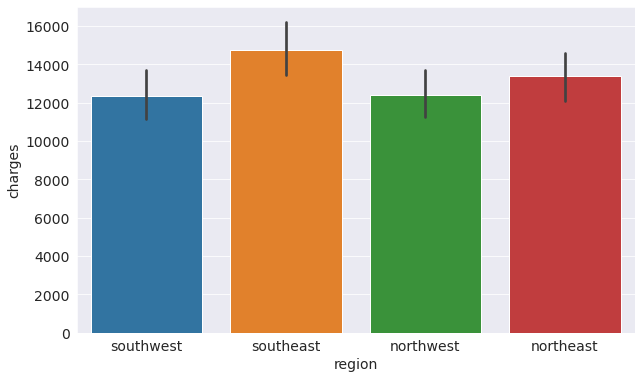

In [201]:
#Dependence on charges on region parameter
sns.barplot(data = df, x='region', y='charges')

In [223]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[['region']])
encoder.categories_
one_hot = encoder.transform(df[['region']]).toarray()
#creates a 2 dimensional one-hot encoded vector
df[['ne','nw','se','sw']] = one_hot
inputs = df[['age', 'bmi','children','smoker_codes','sex_codes','ne','nw','se','sw']]
targets = df.charges
model5  = LinearRegression()
model5.fit(inputs, targets)

results = model5.predict(inputs)

loss = RMSE_loss(results, targets)
print(loss)

print('Model Parameters: ')
print(model5.coef_)
print(model5.intercept_)

6041.679651174455
Model Parameters: 
[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
-12525.547811195465


In [252]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['age', 'children', 'bmi']
scaler = StandardScaler()
scaler.fit(df[numerical_cols])
print(scaler.mean_)
print(scaler.var_)
scaled_inputs =  scaler.transform(df[numerical_cols]) #return a numpy object
cat_data = df[['smoker_codes','sex_codes','ne','nw','se','sw']].values
inputs = np.concatenate((scaled_inputs, cat_data), axis = 1)
targets = df.charges

model6 = LinearRegression()
model6.fit(inputs, targets)

results = model6.predict(inputs)

loss = RMSE_loss(results, targets)
print(loss)

print('Model Parameters: ')
print(model6.coef_)
print(model6.intercept_)

arr = np.sort(model6.coef_)
print(arr)

[39.20702541  1.09491779 30.66339686]
[197.25385199   1.45212664  37.16008997]
6041.688629812385
Model Parameters: 
[ 3.60717946e+03  5.73945140e+02  2.06798254e+03  2.38473215e+04
 -1.31490848e+02  7.82530357e+15  7.82530357e+15  7.82530357e+15
  7.82530357e+15]
-7825303574352645.0
[-1.31490848e+02  5.73945140e+02  2.06798254e+03  3.60717946e+03
  2.38473215e+04  7.82530357e+15  7.82530357e+15  7.82530357e+15
  7.82530357e+15]
